In [1]:
from main import *

In [2]:
e5, sr = librosa.load("mp3 Notes/e5.mp3", sr=44100)
d4, sr = librosa.load("mp3 Notes/d4.mp3", sr=44100)
mix = e5[:len(d4)]+ d4
print(mix.shape)


(28685,)


In [3]:
eg = AudioSourceSeperation("recordings/download.wav")
eg.import_numpy(mix)
print(eg.samples.shape)
eg.set_duration(0,0.2)
eg.generate_window_functions(5000)

# w = [293.66, 659.25]

w = [130.66, 800.25]
M = [15,15]
K = 2

eg.log_posterior(w, M, K)

# -4517 [293.66, 659.25]
# 3250  [293.66, 750.25]
# 1884 [130.66, 800.25]


Windows: (74, 182016)
Windows: (13, 28685)
Recording File: recordings/download.wav 
Sampling Frequency: 44100 
Samples: 0 to 28685 (28685) 
Time: 0.00s to 0.65s (0.65s) 

(28685,)
Windows: (5, 8820)
Recording File: recordings/download.wav 
Sampling Frequency: 44100 
Samples: 0 to 8820 (8820) 
Time: 0.00s to 0.20s (0.20s) 

Windows: (5, 8820)


100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Inverting S...
S Inverted
Generating P...
P Generated


-1884.4143193169548

In [29]:
eg.MCMC()

810.8464134684972
1238.8331380905747


In [ ]:
# w_test = [0.01,0.5,1,2]

# for n in w_test:
#     w = [n*293.66, n*659.25]
#     error = eg.log_likelihood(w)
#     print(error)
M = [15,15]
K = 2

eg.log_posterior(w, M, K)


nx, ny = (15, 15)
# nx, ny = (15, 15)
x = np.linspace(0.95, 1.05, nx)
y = np.linspace(0.95, 1.05, ny)
output = np.zeros((nx,ny))
for num1, x1 in enumerate(x):
    print(num1)
    for num2, y1 in enumerate(y):
        error = eg.log_posterior([x1*293.6, y1*659.25], M, K)
        output[num1,num2] = error

# xv, yv = np.meshgrid(x, y, sparse=True)
# zs = eg.log_likelihood(xv*293.66, yv*659.25)
# zz = eg.log_likelihood([xv[0][0]*293.66, yv[0][0]*659.25])




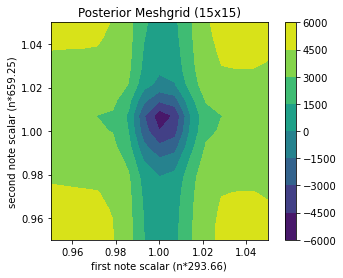

In [8]:
h = plt.contourf(x, y, output)
plt.axis('scaled')
plt.colorbar()
plt.title('Posterior Meshgrid (15x15)')
plt.xlabel('first note scalar (n*293.66)')
plt.ylabel('second note scalar (n*659.25)')
plt.show()

1.3473791652809923

In [ ]:
eg.generate_M_K_w([293.66, 659.25], [15,15])
eg.generate_D()

In [34]:
print(eg.w)

[293.66, 659.25]


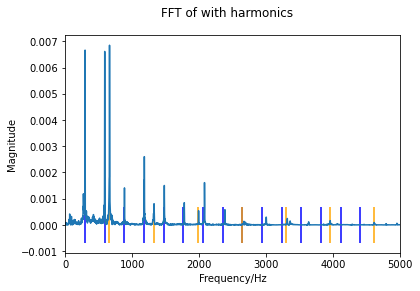

In [35]:
eg.fft_plot()

In [36]:
eg_plt = VisualiseAudio(eg.samples)
# eg_plt.visualise()

In [37]:
print(eg.samples.shape)

(26460,)


In [38]:
eg.MLE()
resynthed = eg.resynth_sound()
error = eg.samples - resynthed
eg.import_numpy(error)

Windows: (12, 26460)
Recording File: recordings/download.wav 
Sampling Frequency: 44100 
Samples: 0 to 26460 (26460) 
Time: 0.00s to 0.60s (0.60s) 



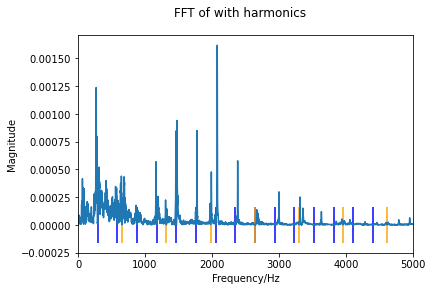

In [39]:
eg.fft_plot()

In [40]:
Audio(data=eg.samples, rate=eg.rate)

In [ ]:
K = [293.66, 659.25]
M = [15,15]
w = []
for num, root in enumerate(K):
    w.append([root*i for i in range(1, M[num]+ 1)])
w = np.array(w)
print(w)
pos.w = w
pos.K = K
pos.M = M

[[ 293.66  587.32  880.98 1174.64 1468.3  1761.96 2055.62 2349.28 2642.94
  2936.6  3230.26 3523.92 3817.58 4111.24 4404.9 ]
 [ 659.25 1318.5  1977.75 2637.   3296.25 3955.5  4614.75 5274.   5933.25
  6592.5  7251.75 7911.   8570.25 9229.5  9888.75]]
